In [1]:
from langgraph.graph import StateGraph
from typing import TypedDict

In [2]:
from langgraph.graph import StateGraph,START,END

In [3]:
from dotenv import load_dotenv

In [ ]:
from langchain_groq import ChatGroq

models = [
    "llama-3.1-8b-instant",
    "llama-3.3-70b-versatile"

]

for m in models:
    try:
        llm = ChatGroq(model=m)
        res = llm.invoke("Say hi in one word")
        print(f"✅ {m} -> {res}")
    except Exception as e:
        print(f"❌ {m} failed -> {e}")


❌ llama3-8b-8192 failed -> Error code: 400 - {'error': {'message': 'The model `llama3-8b-8192` has been decommissioned and is no longer supported. Please refer to https://console.groq.com/docs/deprecations for a recommendation on which model to use instead.', 'type': 'invalid_request_error', 'code': 'model_decommissioned'}}
❌ llama3-70b-8192 failed -> Error code: 400 - {'error': {'message': 'The model `llama3-70b-8192` has been decommissioned and is no longer supported. Please refer to https://console.groq.com/docs/deprecations for a recommendation on which model to use instead.', 'type': 'invalid_request_error', 'code': 'model_decommissioned'}}
❌ mixtral-8x7b-32768 failed -> Error code: 400 - {'error': {'message': 'The model `mixtral-8x7b-32768` has been decommissioned and is no longer supported. Please refer to https://console.groq.com/docs/deprecations for a recommendation on which model to use instead.', 'type': 'invalid_request_error', 'code': 'model_decommissioned'}}
❌ gemma-7b-i

In [9]:
from langchain_groq import ChatGroq
import os

llm = ChatGroq(
    groq_api_key=os.getenv("GROQ_API"),
    model="llama-3.3-70b-versatile"
)

llm.invoke("Hello bhai")


AIMessage(content='Namaste bhai, kaise ho? (Hello brother, how are you?)', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 38, 'total_tokens': 56, 'completion_time': 0.075997804, 'completion_tokens_details': None, 'prompt_time': 0.001714195, 'prompt_tokens_details': None, 'queue_time': 0.058503895, 'total_time': 0.077711999}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b7e54-774b-7c42-b2e3-bb63e0999e50-0', usage_metadata={'input_tokens': 38, 'output_tokens': 18, 'total_tokens': 56})

In [10]:
class LLMState(TypedDict):
    question:str
    ans:str

In [11]:
graph=StateGraph(LLMState)

In [12]:
def llm_qa(state:LLMState)->LLMState:
    question=state['question']
    #prompt
    prompt=f'Answer the following question{question}'
    # ask the llm model
    answer=llm.invoke(prompt).content
    #
    state['ans']=answer
    return state

In [13]:
graph.add_node('llm_qa',llm_qa)

In [14]:
graph.add_edge(START,'llm_qa')
graph.add_edge('llm_qa',END)

In [15]:
workflow=graph.compile()

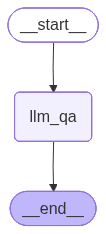

In [16]:
from IPython.display import Image, display

display(
    Image(
        workflow.get_graph().draw_mermaid_png()
    )
)


In [17]:
#execute:
initial_state={'question':"how did the life on earth started"}
output_state=workflow.invoke(initial_state)

In [18]:
print(output_state)

{'question': 'how did the life on earth started', 'ans': "The origin of life on Earth is a complex and still-unresolved question that has puzzled scientists and scholars for centuries. While there is no consensus on a single theory, I'll provide an overview of the most widely accepted scientific explanations.\n\n**The Primordial Soup Hypothesis**\n\nThe most popular theory is the Primordial Soup Hypothesis, proposed by Russian biochemist Alexander Oparin in the 1920s and later developed by Stanley Miller and Harold Urey in the 1950s. This theory suggests that life arose from a mixture of organic compounds in the early Earth's oceans, which were rich in energy sources such as lightning, ultraviolet radiation, and chemical reactions.\n\n**Steps in the Emergence of Life**\n\nHere's a simplified outline of the key steps in the emergence of life on Earth:\n\n1. **Primordial Atmosphere**: About 4.5 billion years ago, the Earth's atmosphere was formed, primarily composed of methane, ammonia, 

In [19]:
print(output_state['ans'])

The origin of life on Earth is a complex and still-unresolved question that has puzzled scientists and scholars for centuries. While there is no consensus on a single theory, I'll provide an overview of the most widely accepted scientific explanations.

**The Primordial Soup Hypothesis**

The most popular theory is the Primordial Soup Hypothesis, proposed by Russian biochemist Alexander Oparin in the 1920s and later developed by Stanley Miller and Harold Urey in the 1950s. This theory suggests that life arose from a mixture of organic compounds in the early Earth's oceans, which were rich in energy sources such as lightning, ultraviolet radiation, and chemical reactions.

**Steps in the Emergence of Life**

Here's a simplified outline of the key steps in the emergence of life on Earth:

1. **Primordial Atmosphere**: About 4.5 billion years ago, the Earth's atmosphere was formed, primarily composed of methane, ammonia, water vapor, and other simple molecules.
2. **Organic Molecules**: E

In [20]:
llm.invoke("how did the life on earth started")

AIMessage(content="The origin of life on Earth is a complex and still somewhat mysterious topic that has been studied by scientists from various fields, including biology, chemistry, geology, and astrophysics. While there is no consensus on a single theory, here's a summary of the most widely accepted ideas:\n\n**The Primordial Soup Hypothesis (1920s)**\n\nThe Russian biochemist Alexander Oparin proposed that life arose from a primordial soup of organic molecules, such as amino acids, nucleotides, and lipids, which were present on Earth about 4 billion years ago. These molecules were likely formed through chemical reactions involving water, energy, and simple compounds, such as methane and ammonia.\n\n**The Building Blocks of Life (1950s-1960s)**\n\nThe Miller-Urey experiment (1953) demonstrated that amino acids, the building blocks of proteins, could be synthesized from simple molecules in the presence of energy sources, such as lightning. This experiment supported the idea that the r